### Imports

In [1]:
%matplotlib inline

import missingno as msno
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.style
import matplotlib as mpl
mpl.style.use('seaborn-white')
import matplotlib.pyplot as plt
from cycler import cycler
from sklearn.pipeline import Pipeline
from pandas.plotting import scatter_matrix
from matplotlib.pyplot import figure
from sklearn.cluster import KMeans
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import KFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier, RandomTreesEmbedding, GradientBoostingClassifier
import warnings
warnings.filterwarnings("ignore")
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from yellowbrick.features import Rank1D
from yellowbrick.features import Rank2D
from yellowbrick.classifier import ClassBalance
from yellowbrick.model_selection import LearningCurve
from yellowbrick.model_selection import ValidationCurve
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ClassificationReport
from yellowbrick.features.importances import FeatureImportances

### About the Data

I am using Home Mortgage Disclosure Act (HMDA) data for one year 2013,sample of 25,000 observations. https://www.consumerfinance.gov/data-research/hmda/explore 

Let's load the data:

### Data Ingestion and Wrangling

In [2]:
dataset = pd.read_csv("/Users/tamananaheeme/Desktop/fixtures/hmda2013sample.csv")
dataset.head(5)

,Unnamed: 0,tract_to_msamd_income,rate_spread,population,minority_population,number_of_owner_occupied_units,number_of_1_to_4_family_units,loan_amount_000s,hud_median_family_income,applicant_income_000s,...,applicant_sex_name,applicant_race_name_5,applicant_race_name_4,applicant_race_name_3,applicant_race_name_2,applicant_race_name_1,applicant_ethnicity_name,agency_name,agency_abbr,action_taken_name
0,0,117.730003,NaN,5180,63.189999,992,1215,79,61300,56,...,Male,NaN,NaN,NaN,NaN,White,Hispanic or Latino,National Credit Union Administration,NCUA,Loan originated
1,1,84.919998,NaN,4873,23.070000,1152,1882,128,54900,75,...,Female,NaN,NaN,NaN,NaN,White,Not Hispanic or Latino,Department of Housing and Urban Development,HUD,Loan originated
2,2,42.509998,NaN,1715,58.480000,346,784,43,68700,38,...,Male,NaN,NaN,NaN,NaN,White,Not Hispanic or Latino,Consumer Financial Protection Bureau,CFPB,Application denied by financial institution
3,3,106.650002,NaN,4071,15.920000,1180,1472,100,67800,65,...,Male,NaN,NaN,NaN,NaN,White,Not Hispanic or Latino,Consumer Financial Protection Bureau,CFPB,Application denied by financial institution
4,4,88.489998,NaN,3001,16.790001,503,330,103,77800,151,...,Female,NaN,NaN,NaN,NaN,White,Not Hispanic or Latino,Consumer Financial Protection Bureau,CFPB,Application approved but not accepted


### What missing values are there?

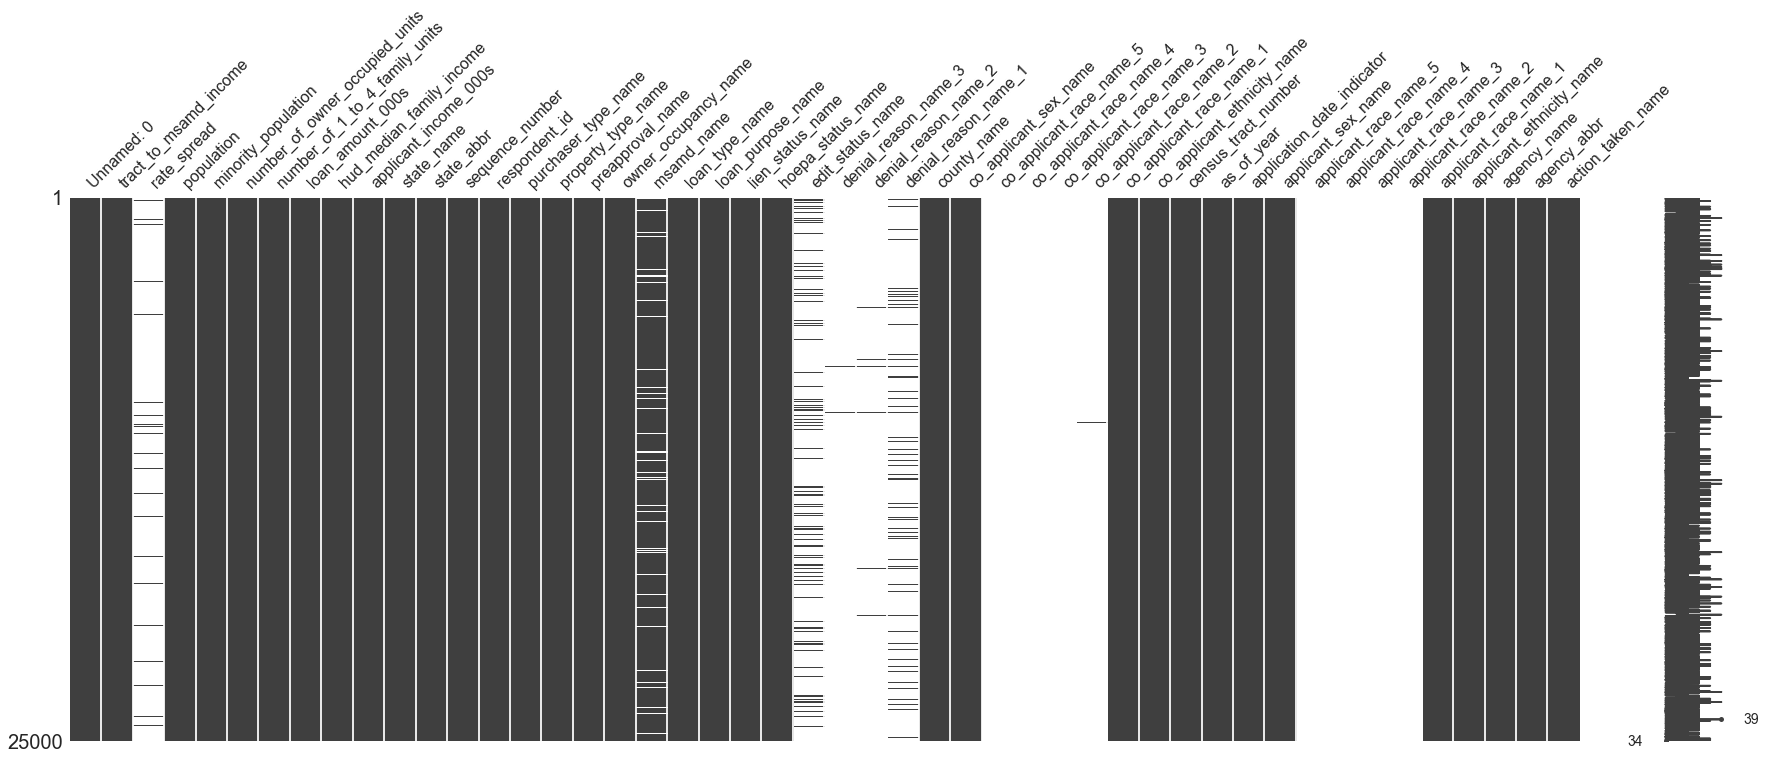

In [3]:
#Visualizing the location of missing values
msno.matrix(dataset, figsize = (30,10))

In [5]:
dataset.count()

Unnamed: 0                        25000
tract_to_msamd_income             25000
rate_spread                         670
population                        25000
minority_population               25000
number_of_owner_occupied_units    25000
number_of_1_to_4_family_units     25000
loan_amount_000s                  25000
hud_median_family_income          25000
applicant_income_000s             25000
state_name                        25000
state_abbr                        25000
sequence_number                   25000
respondent_id                     25000
purchaser_type_name               25000
property_type_name                25000
preapproval_name                  25000
owner_occupancy_name              25000
msamd_name                        23291
loan_type_name                    25000
loan_purpose_name                 25000
lien_status_name                  25000
hoepa_status_name                 25000
edit_status_name                   3714
denial_reason_name_3                119


In [6]:
dataset['locality_type'] = None
cloc = dataset.columns.get_loc('locality_type')

i = 0
for x in dataset['msamd_name'].isna():
    if x == True:
        dataset.iat[i, cloc]= 0
        
    else: 
        dataset.iat[i, cloc]= 1
        
    i+=1
        
pd.crosstab(dataset['msamd_name'],dataset['locality_type'], margins=True, dropna=False) 

locality_type,0,1,All
msamd_name,,,
"Albany, Schenectady, Troy - NY",0,4,4
Alexandria - LA,0,20,20
"Allentown, Bethlehem, Easton - PA, NJ",0,170,170
Anchorage - AK,0,733,733
Anderson - IN,0,1,1
Appleton - WI,0,2,2
Asheville - NC,0,1,1
"Atlanta, Sandy Springs, Marietta - GA",0,78,78
"Auburn, Opelika - AL",0,4,4


In [7]:
dataset['action_taken'] = dataset.action_taken_name.apply(lambda x: 1 if x in ['Loan purchased by the institution', 'Loan originated'] else 0)
pd.crosstab(dataset['action_taken_name'],dataset['action_taken'], margins=True)

action_taken,0,1,All
action_taken_name,,,
Application approved but not accepted,1038,0,1038
Application denied by financial institution,3819,0,3819
Application withdrawn by applicant,2220,0,2220
File closed for incompleteness,753,0,753
Loan originated,0,14142,14142
Loan purchased by the institution,0,3028,3028
All,7830,17170,25000


In [8]:
DATA_targ_numeric = dataset[['action_taken',
            'tract_to_msamd_income', 
            'population', 
            'minority_population', 
            'number_of_owner_occupied_units', 
            'number_of_1_to_4_family_units', 
            'loan_amount_000s', 
            'hud_median_family_income', 
            'applicant_income_000s',
            'locality_type'
            ]]
#resolve missing values in applicant_income_000s
DATA_targ_numeric.fillna(DATA_targ_numeric.mean(), inplace=True)
DATA_targ_numeric.info()
DATA_basefile = DATA_targ_numeric

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 10 columns):
action_taken                      25000 non-null int64
tract_to_msamd_income             25000 non-null float64
population                        25000 non-null int64
minority_population               25000 non-null float64
number_of_owner_occupied_units    25000 non-null int64
number_of_1_to_4_family_units     25000 non-null int64
loan_amount_000s                  25000 non-null int64
hud_median_family_income          25000 non-null int64
applicant_income_000s             25000 non-null int64
locality_type                     25000 non-null int64
dtypes: float64(2), int64(8)
memory usage: 1.9 MB


In [9]:
dataset.columns

Index(['Unnamed: 0', 'tract_to_msamd_income', 'rate_spread', 'population',
       'minority_population', 'number_of_owner_occupied_units',
       'number_of_1_to_4_family_units', 'loan_amount_000s',
       'hud_median_family_income', 'applicant_income_000s', 'state_name',
       'state_abbr', 'sequence_number', 'respondent_id', 'purchaser_type_name',
       'property_type_name', 'preapproval_name', 'owner_occupancy_name',
       'msamd_name', 'loan_type_name', 'loan_purpose_name', 'lien_status_name',
       'hoepa_status_name', 'edit_status_name', 'denial_reason_name_3',
       'denial_reason_name_2', 'denial_reason_name_1', 'county_name',
       'co_applicant_sex_name', 'co_applicant_race_name_5',
       'co_applicant_race_name_4', 'co_applicant_race_name_3',
       'co_applicant_race_name_2', 'co_applicant_race_name_1',
       'co_applicant_ethnicity_name', 'census_tract_number', 'as_of_year',
       'application_date_indicator', 'applicant_sex_name',
       'applicant_race_name_5', 

In [10]:
dataset = dataset.drop(dataset.columns[0], axis=1)
dataset = dataset.drop(['rate_spread', 
        'sequence_number', 
        'respondent_id',
        'state_name',
        'county_name',
        'edit_status_name', 
        'denial_reason_name_3', 
        'denial_reason_name_2', 
        'denial_reason_name_1', 
        'co_applicant_race_name_5', 
        'co_applicant_race_name_4', 
        'co_applicant_race_name_3', 
        'co_applicant_race_name_2',
        'census_tract_number',
        'application_date_indicator', 
        'applicant_race_name_5', 
        'applicant_race_name_4', 
        'applicant_race_name_3', 
        'applicant_race_name_2',                
        
        ], 
        axis=1)

In [11]:
dataset = dataset.drop(['msamd_name','action_taken_name','agency_abbr'], 
        axis=1)

In [12]:
dataset.columns

Index(['tract_to_msamd_income', 'population', 'minority_population',
       'number_of_owner_occupied_units', 'number_of_1_to_4_family_units',
       'loan_amount_000s', 'hud_median_family_income', 'applicant_income_000s',
       'state_abbr', 'purchaser_type_name', 'property_type_name',
       'preapproval_name', 'owner_occupancy_name', 'loan_type_name',
       'loan_purpose_name', 'lien_status_name', 'hoepa_status_name',
       'co_applicant_sex_name', 'co_applicant_race_name_1',
       'co_applicant_ethnicity_name', 'as_of_year', 'applicant_sex_name',
       'applicant_race_name_1', 'applicant_ethnicity_name', 'agency_name',
       'locality_type', 'action_taken'],
      dtype='object')

In [13]:
non_categorical_features = ['action_taken',
                        'tract_to_msamd_income', 
                        'population', 
                        'minority_population', 
                        'number_of_owner_occupied_units', 
                        'number_of_1_to_4_family_units', 
                        'loan_amount_000s', 
                        'hud_median_family_income', 
                        'applicant_income_000s',
                        'locality_type'
                       ]

In [46]:
for categorical_feature in list(dataset.columns):
    if categorical_feature not in non_categorical_features:
        dataset[categorical_feature] = dataset[categorical_feature].astype('category')
        dummies = pd.get_dummies(dataset[categorical_feature], prefix=categorical_feature)
        DATA_basefile = pd.concat([DATA_basefile, dummies], axis=1)
        

In [15]:
# Determine the shape of the data
print("{} instances with {} features\n".format(*DATA_basefile.shape))

# Determine the frequency of each class
print(pd.crosstab(index=dataset['action_taken'], columns="count"))

25000 instances with 129 features

col_0         count
action_taken       
0              7830
1             17170


In [18]:
# Extracting our X and y data
X = DATA_basefile[DATA_basefile.columns[1:]] 
y = DATA_basefile['action_taken']

print(X.shape, y.shape)

(25000, 128) (25000,)


In [19]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Columns: 128 entries, tract_to_msamd_income to agency_name_Office of the Comptroller of the Currency
dtypes: float64(2), int64(7), uint8(119)
memory usage: 4.6 MB


In [20]:
# adding line of code to fill in missing values
X.fillna(X.mean(), inplace=True)

In [21]:
X.describe()

,tract_to_msamd_income,population,minority_population,number_of_owner_occupied_units,number_of_1_to_4_family_units,loan_amount_000s,hud_median_family_income,applicant_income_000s,locality_type,state_abbr_AK,...,applicant_ethnicity_name_Hispanic or Latino,"applicant_ethnicity_name_Information not provided by applicant in mail, Internet, or telephone application",applicant_ethnicity_name_Not Hispanic or Latino,applicant_ethnicity_name_Not applicable,agency_name_Consumer Financial Protection Bureau,agency_name_Department of Housing and Urban Development,agency_name_Federal Deposit Insurance Corporation,agency_name_Federal Reserve System,agency_name_National Credit Union Administration,agency_name_Office of the Comptroller of the Currency
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,...,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,117.659708,5330.473960,30.654104,1409.926200,1821.22132,216.371720,70200.892000,113.075120,0.931640,0.031760,...,0.092000,0.091280,0.777000,0.039720,0.440840,0.331240,0.073040,0.026400,0.080360,0.048120
std,42.180985,2393.740737,25.230882,694.167618,845.79343,210.610144,16193.235984,166.405326,0.252368,0.175364,...,0.289032,0.288013,0.416267,0.195304,0.496498,0.470669,0.260207,0.160325,0.271855,0.214024
min,13.040000,158.000000,1.000000,6.000000,1.00000,1.000000,16400.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.489998,3803.000000,10.940000,929.750000,1275.75000,101.000000,60000.000000,52.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,110.830002,4972.000000,22.129999,1330.000000,1717.00000,169.000000,66000.000000,82.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,138.389999,6425.250000,43.320000,1780.000000,2261.00000,277.000000,77800.000000,129.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,405.700012,33201.000000,99.870003,6886.000000,9464.00000,10000.000000,112200.000000,8814.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Exploratory Analysis and Feature Selection

In [22]:
dataset.fillna(dataset.mean(), inplace=True)

In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 27 columns):
tract_to_msamd_income             25000 non-null float64
population                        25000 non-null int64
minority_population               25000 non-null float64
number_of_owner_occupied_units    25000 non-null int64
number_of_1_to_4_family_units     25000 non-null int64
loan_amount_000s                  25000 non-null int64
hud_median_family_income          25000 non-null int64
applicant_income_000s             25000 non-null int64
state_abbr                        25000 non-null category
purchaser_type_name               25000 non-null category
property_type_name                25000 non-null category
preapproval_name                  25000 non-null category
owner_occupancy_name              25000 non-null category
loan_type_name                    25000 non-null category
loan_purpose_name                 25000 non-null category
lien_status_name                  25000 n

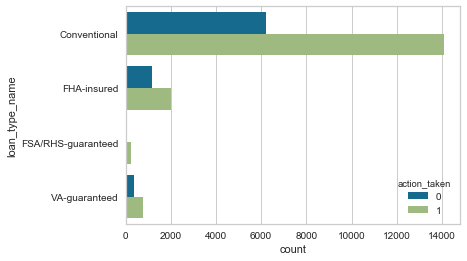

In [24]:
 ax = sns.countplot(y='loan_type_name', hue='action_taken', data=dataset,)

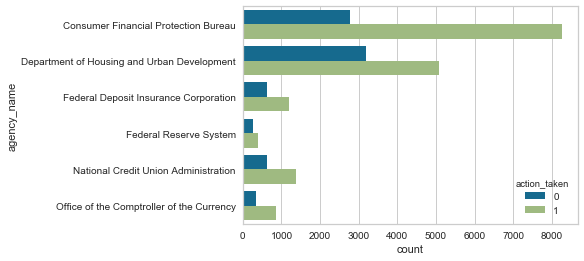

In [25]:
ax = sns.countplot(y='agency_name', hue='action_taken', data=dataset,)

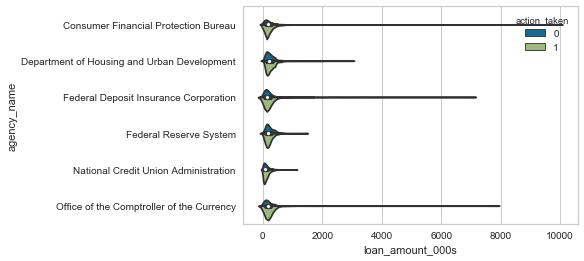

In [26]:
sns.violinplot(x='loan_amount_000s', y='agency_name', hue='action_taken', data=dataset, split=True, scale='count')

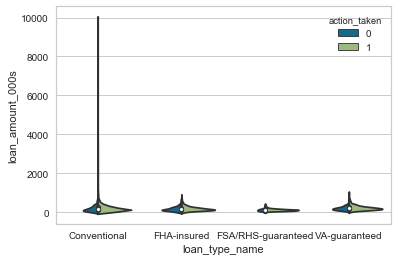

In [27]:
sns.violinplot(x='loan_type_name', y='loan_amount_000s', hue='action_taken', data=dataset, split=True, scale='count')


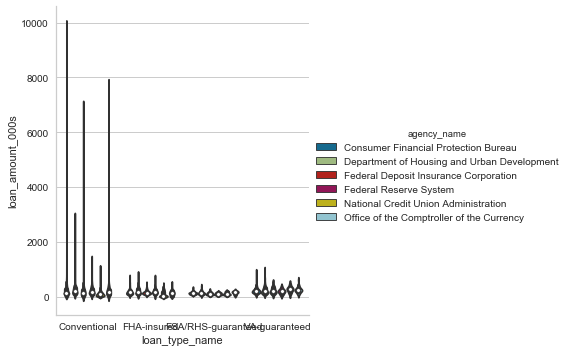

In [28]:
g = sns.catplot(x='loan_type_name', y='loan_amount_000s', hue='agency_name',
                data=dataset, kind="violin") 

In [44]:
features = ['tract_to_msamd_income', 'population', 'minority_population',
       'number_of_owner_occupied_units', 'number_of_1_to_4_family_units',
       'loan_amount_000s','hud_median_family_income', 'applicant_income_000s',
       'state_abbr','purchaser_type_name', 'property_type_name',
       'preapproval_name', 'loan_type_name',
       'loan_purpose_name', 'hoepa_status_name',
       'co_applicant_sex_name', 'co_applicant_race_name_1',
       'co_applicant_ethnicity_name', 'applicant_sex_name',
       'applicant_ethnicity_name', 'agency_name',
       'locality_type',
            
        ]

target = ['action_taken']